<h3> importing libraries</h3>

In [73]:

import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler

<h3>Getting data</h3>
<p>in this part we are getting the data from training and test files.splitting the train data into X(the images) Y(the number) then splitting each into train and validate.</p>

In [74]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(len(training_data))

y = training_data['label']
x = training_data.drop('label', axis=1)

y = y.to_numpy()
x = x.to_numpy()

y = torch.tensor(y)
x = torch.tensor(x)


x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2,stratify= y, random_state=42)


dataset = TensorDataset(x_train,y_train)
dataset_validate = TensorDataset(x_validate,y_validate)

print("len training:", len(x_train), len(y_train))
print("len validation:", len(x_validate), len(y_validate))


42000
len training: 33600 33600
len validation: 8400 8400


<h3>Data loader</h3>
<p>Batching: It divides your dataset into batches. Training a neural network on the entire dataset at once might be memory-intensive</p>

In [75]:
batch=16

loader = DataLoader(dataset, shuffle=True, batch_size=batch)

validation_loader=DataLoader(dataset_validate, shuffle=False, batch_size=batch)



<h3>introducing my network part which is our neural network</h3>
<p>it consists of 128 neurons first hidden layer taking input from 784 features(pixels)then passing the o/p of first layer to a relu function and then second layer predict a number from 0 to 9</p>

In [76]:
class myNetwork(nn.Module):
    def __init__(self ):
        super(myNetwork,self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.layer2= nn.Linear(128, 64)
        self.layer3=nn.Linear(64,10)
    def forward(self, x):
        x=x.float()
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return x

defining neural instance and optmizer as stochastic gradient descent with learning rate =0.01

<h1>Define draw function</h1>

In [77]:
def draw(training_accuracy, validation_accuracy,loses,validation_loss):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    sns.set(style="whitegrid")


    sns.lineplot(x=np.arange(1, len(loses)+1), y=loses,ax=axes[0,0])
    axes[0,0].set_title('cost function for training data')



    sns.lineplot(x=np.arange(1, len(training_accuracy)+1), y=training_accuracy,ax=axes[0,1])
    axes[0,1].set_title('accuracy for training data')


    sns.lineplot(x=np.arange(1,len(validation_loss)+1), y=validation_loss,ax=axes[1,0])
    axes[1,0].set_title('cost function for validation data')


    sns.lineplot(x=np.arange(1, len(validation_accuracy)+1), y=validation_accuracy,ax=axes[1,1])
    axes[1,1].set_title('accuracy for validation data')

    plt.tight_layout()


    plt.show()


<h3>training loop </h3> <p>  the whole training data set is proccesed in each epoch in the inner loop the cost is updated after each iteration when a whole batch is proccesed </p><p>we are calculating the accuracy and the losses in each epoch</p>

<h1>plotting the cost and accuracy</h1>
<p>Training and validation loss X axis epoch number Y axis cost.
Training and validation accuracy X axis epoch number Y axis accuracy</p>


<h3>Function to try diffrent learning rates and batch sizes</h3>
            

In [99]:
from torch.nn.utils import clip_grad_norm_
def training_loop(batch,learning_rate,model):
    print(learning_rate)

    num_epochs=7
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    loader = DataLoader(dataset, shuffle=True, batch_size=batch)
    validation_loader=DataLoader(dataset_validate, shuffle=False, batch_size=batch)
    loses=[]
    lossFunc=CrossEntropyLoss()
    validation_loss=[]
    total_samples_train=len(loader)*batch
    total_validation_samples=len(validation_loader)*batch
    #print(total_validation_samples)
    training_accuracy=[]
    validation_accuracy=[]
    for i in range(num_epochs):
        total_loss=0
        correct_pred=0
        i=0
        for X,Y in loader:
            optimizer.zero_grad()
            outputs = model(X)
            #print(outputs,Y)
            max_values, indices = torch.max(outputs, 1)
            loss = lossFunc(outputs, Y)
            loss.backward()
            optimizer.step()
            total_loss+=loss.item()
            #print(total_loss)
            correct_pred += (indices == Y).sum().item()
        loses.append(total_loss)
        training_accuracy.append(correct_pred/total_samples_train)
        with torch.no_grad():
            model.eval()
            total_val_loss = 0
            correct_pred=0
            for val_data, val_labels in validation_loader:
                val_outputs = model(val_data)
                max_values, indices = torch.max(val_outputs, 1)
                correct_pred += (indices == val_labels).sum().item()
                val_loss = lossFunc(val_outputs, val_labels)
                total_val_loss+=float(val_loss)
            validation_loss.append(total_val_loss)
            validation_accuracy.append(correct_pred/total_validation_samples)
    draw(training_accuracy,validation_accuracy,loses,validation_loss)
    return model



0.001
tensor(0.2235, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0136, grad_fn=<NllLossBackward0>)
tensor(0.0177, grad_fn=<NllLossBackward0>)
[811.1868480660487, 341.92657475033775, 243.85614795563743, 178.6411000585358, 137.76557852179394, 105.79133305031428, 84.43273708727065]


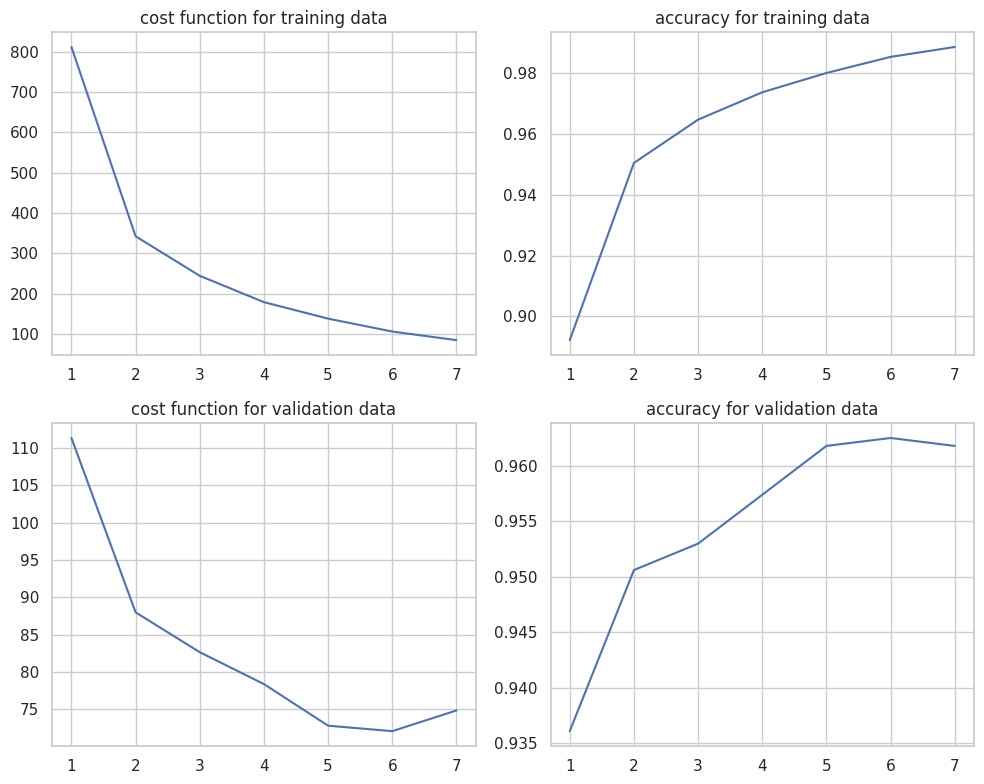

In [87]:
training_loop(16,0.001,myNetwork())

<h3>Try different learning rates</h3>

0.01
tensor(2.3142, grad_fn=<NllLossBackward0>)
tensor(2.2971, grad_fn=<NllLossBackward0>)
tensor(2.3226, grad_fn=<NllLossBackward0>)
tensor(2.2926, grad_fn=<NllLossBackward0>)
tensor(2.3200, grad_fn=<NllLossBackward0>)
tensor(2.3005, grad_fn=<NllLossBackward0>)
tensor(2.3008, grad_fn=<NllLossBackward0>)
[1762726835.4341002, 4832.948766231537, 4832.890523195267, 4832.910722255707, 4832.89944601059, 4832.856515169144, 4832.9410135746]


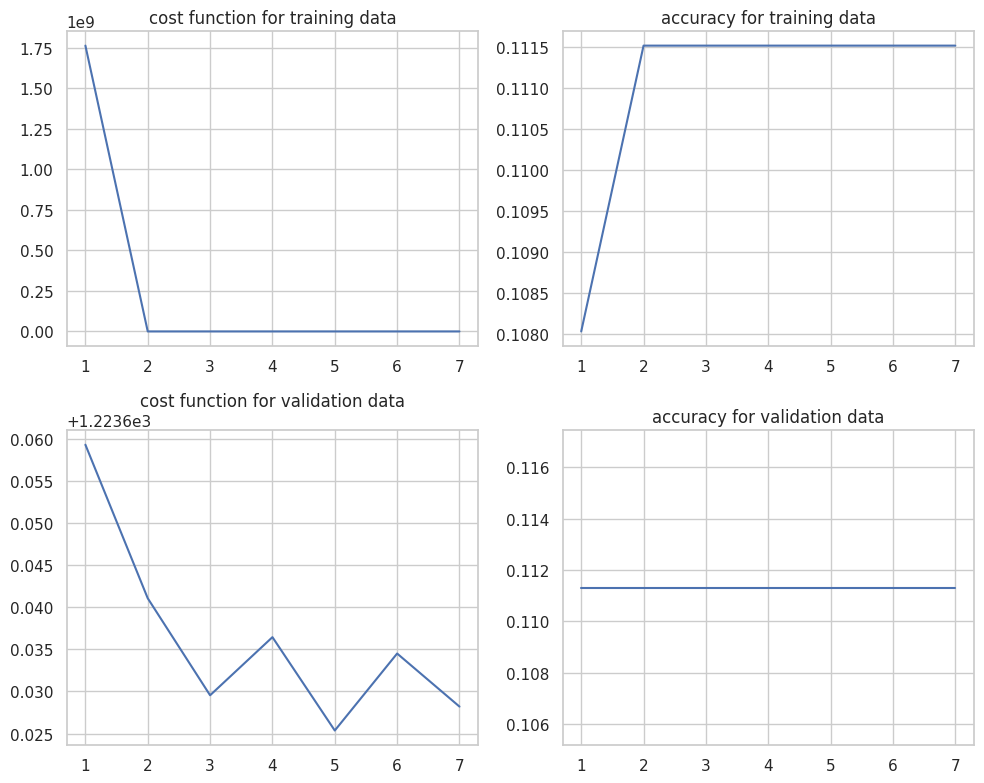

0.001
tensor(0.0965, grad_fn=<NllLossBackward0>)
tensor(0.1749, grad_fn=<NllLossBackward0>)
tensor(0.0638, grad_fn=<NllLossBackward0>)
tensor(0.3318, grad_fn=<NllLossBackward0>)
tensor(0.1795, grad_fn=<NllLossBackward0>)
tensor(0.0432, grad_fn=<NllLossBackward0>)
tensor(0.2161, grad_fn=<NllLossBackward0>)
[821.7474760902114, 341.6434954738943, 241.37880461261375, 185.53354526439944, 141.21308592589048, 110.32077065808699, 86.9749063168274]


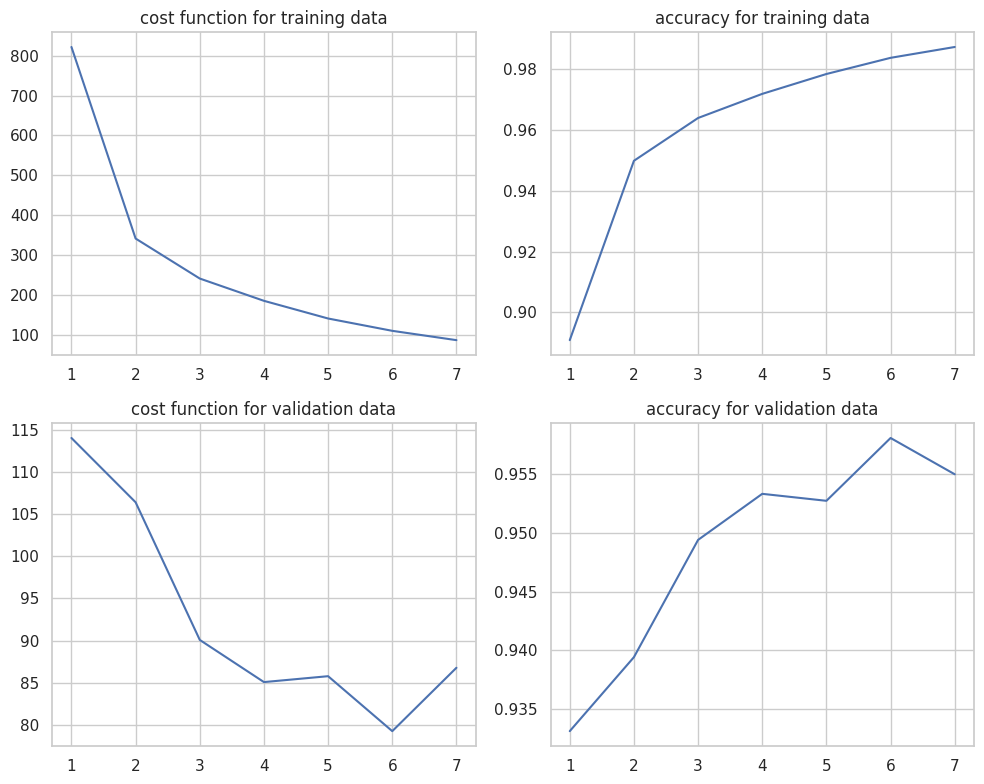

0.007
tensor(1.7156, grad_fn=<NllLossBackward0>)
tensor(0.7572, grad_fn=<NllLossBackward0>)
tensor(0.7524, grad_fn=<NllLossBackward0>)
tensor(1.3545, grad_fn=<NllLossBackward0>)
tensor(1.0423, grad_fn=<NllLossBackward0>)
tensor(0.4270, grad_fn=<NllLossBackward0>)
tensor(0.9441, grad_fn=<NllLossBackward0>)
[3938.0615016818047, 2291.12426674366, 1772.192988589406, 1784.39703989774, 1938.686302267015, 1819.462648294866, 1592.2046379111707]


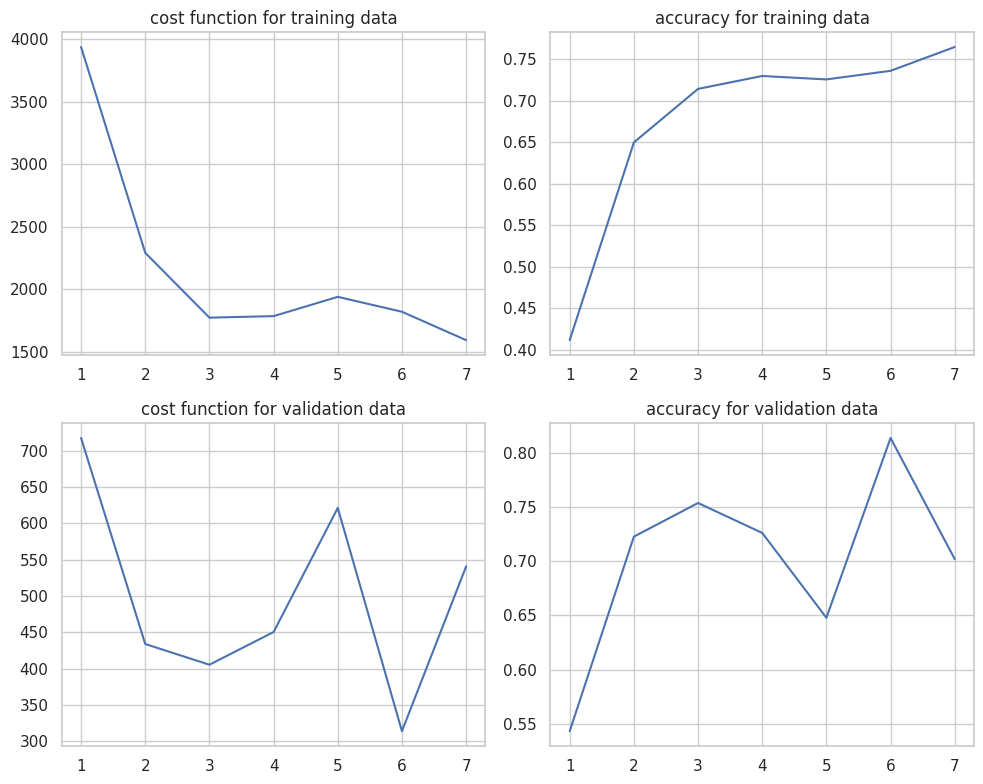

0.005
tensor(0.0854, grad_fn=<NllLossBackward0>)
tensor(0.2132, grad_fn=<NllLossBackward0>)
tensor(0.1035, grad_fn=<NllLossBackward0>)
tensor(0.2819, grad_fn=<NllLossBackward0>)
tensor(0.4162, grad_fn=<NllLossBackward0>)
tensor(0.2207, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
[898.6347957639955, 397.1184404825908, 294.5171982907923, 253.58126808638917, 212.69349942954796, 178.0565052833099, 157.4459907643104]


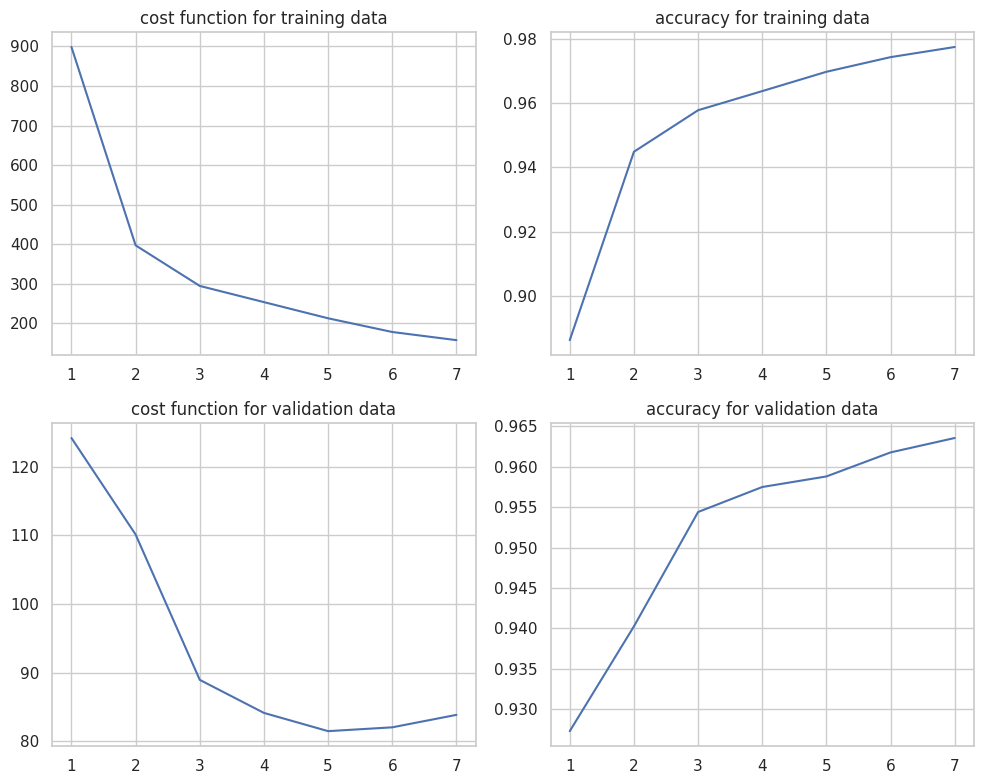

0.003
tensor(0.0475, grad_fn=<NllLossBackward0>)
tensor(0.5535, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0474, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.1184, grad_fn=<NllLossBackward0>)
tensor(0.1071, grad_fn=<NllLossBackward0>)
[826.9129811003804, 334.16488896508235, 235.12032471177372, 183.85841647266352, 148.1876091119193, 122.37551514307233, 97.99250255534389]


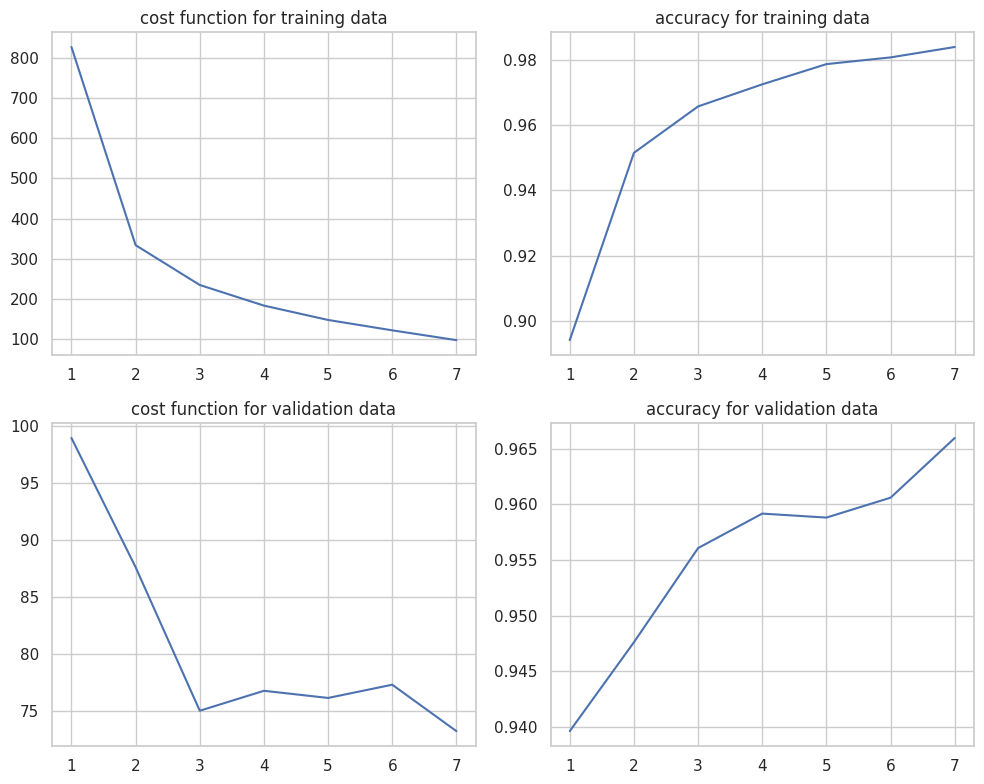

In [88]:
learning_rates = [0.01,0.001,0.007,0.005,0.003]
for rate in range(len(learning_rates)):
    training_loop(16,learning_rates[rate],myNetwork())

<p> we conclude from this graphs that the best learning rate is 0.005 </p>

<h3>Try different batches</h3>

0.005
tensor(0.1659, grad_fn=<NllLossBackward0>)
tensor(0.0816, grad_fn=<NllLossBackward0>)
tensor(0.2428, grad_fn=<NllLossBackward0>)
tensor(0.0926, grad_fn=<NllLossBackward0>)
tensor(0.0882, grad_fn=<NllLossBackward0>)
tensor(0.0184, grad_fn=<NllLossBackward0>)
tensor(0.0167, grad_fn=<NllLossBackward0>)
[478.9066012734547, 194.5742328488268, 146.17741425707936, 115.29626374552026, 94.84307988965884, 83.38180862014997, 69.48873432318214]


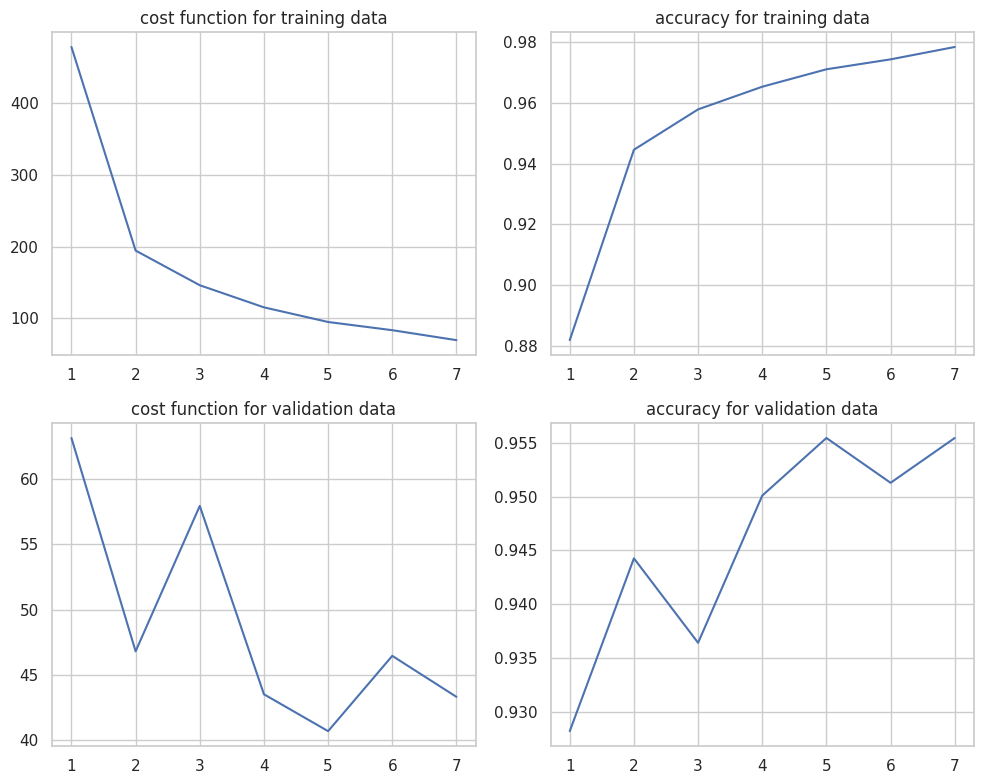

0.005
tensor(0.1272, grad_fn=<NllLossBackward0>)
tensor(0.1568, grad_fn=<NllLossBackward0>)
tensor(0.1869, grad_fn=<NllLossBackward0>)
tensor(0.1842, grad_fn=<NllLossBackward0>)
tensor(0.0494, grad_fn=<NllLossBackward0>)
tensor(0.0413, grad_fn=<NllLossBackward0>)
tensor(0.0473, grad_fn=<NllLossBackward0>)
[280.12365084141493, 95.91655550338328, 70.70989763177931, 56.40125720296055, 45.53644435573369, 35.92790517304093, 29.95758968964219]


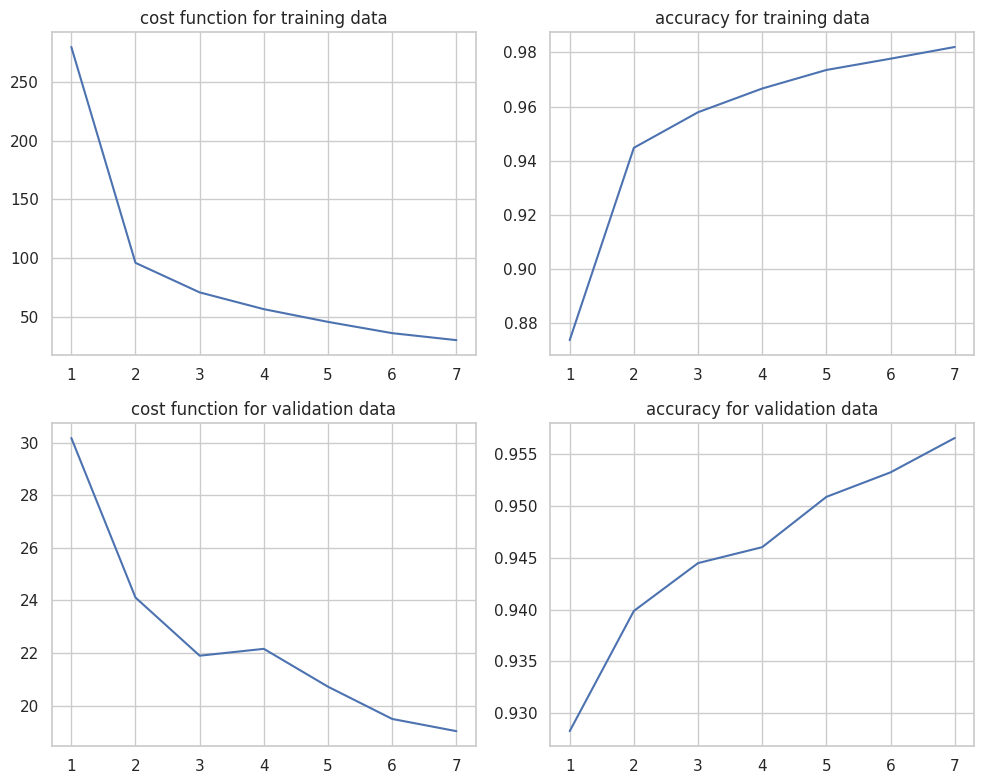

0.005
tensor(0.3997, grad_fn=<NllLossBackward0>)
tensor(0.1449, grad_fn=<NllLossBackward0>)
tensor(0.0945, grad_fn=<NllLossBackward0>)
tensor(0.1306, grad_fn=<NllLossBackward0>)
tensor(0.0312, grad_fn=<NllLossBackward0>)
tensor(0.0903, grad_fn=<NllLossBackward0>)
tensor(0.0754, grad_fn=<NllLossBackward0>)
[252.8479333370924, 62.298922806978226, 45.94422561302781, 37.128966480493546, 30.859293980523944, 27.161323195323348, 23.485118443146348]


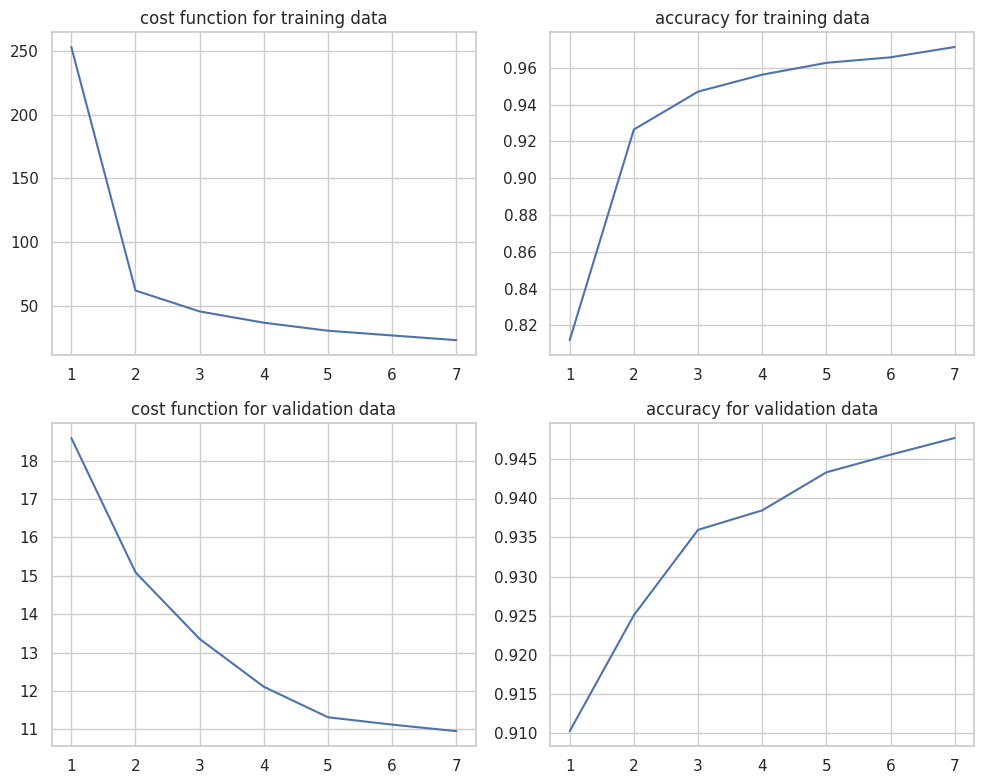

0.005
tensor(0.4418, grad_fn=<NllLossBackward0>)
tensor(0.2435, grad_fn=<NllLossBackward0>)
tensor(0.1080, grad_fn=<NllLossBackward0>)
tensor(0.0660, grad_fn=<NllLossBackward0>)
tensor(0.3738, grad_fn=<NllLossBackward0>)
tensor(0.3172, grad_fn=<NllLossBackward0>)
tensor(0.0701, grad_fn=<NllLossBackward0>)
[201.75353452563286, 38.44063539803028, 29.754727229475975, 24.551375553011894, 21.859519973397255, 19.654754765331745, 17.593143224716187]


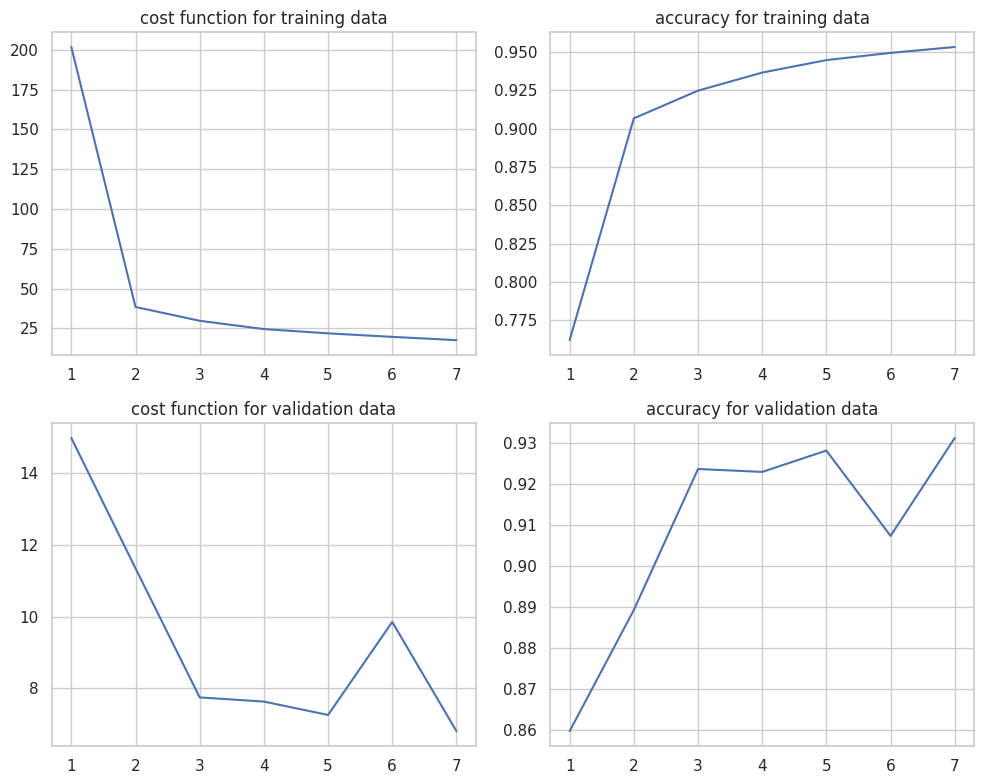

0.005
tensor(0.4340, grad_fn=<NllLossBackward0>)
tensor(0.3943, grad_fn=<NllLossBackward0>)
tensor(0.2769, grad_fn=<NllLossBackward0>)
tensor(0.1573, grad_fn=<NllLossBackward0>)
tensor(0.1604, grad_fn=<NllLossBackward0>)
tensor(0.2147, grad_fn=<NllLossBackward0>)
tensor(0.2819, grad_fn=<NllLossBackward0>)
[160.11006805300713, 25.48426514863968, 19.6623522490263, 16.694995880126953, 14.74057750403881, 13.375034973025322, 12.281695306301117]


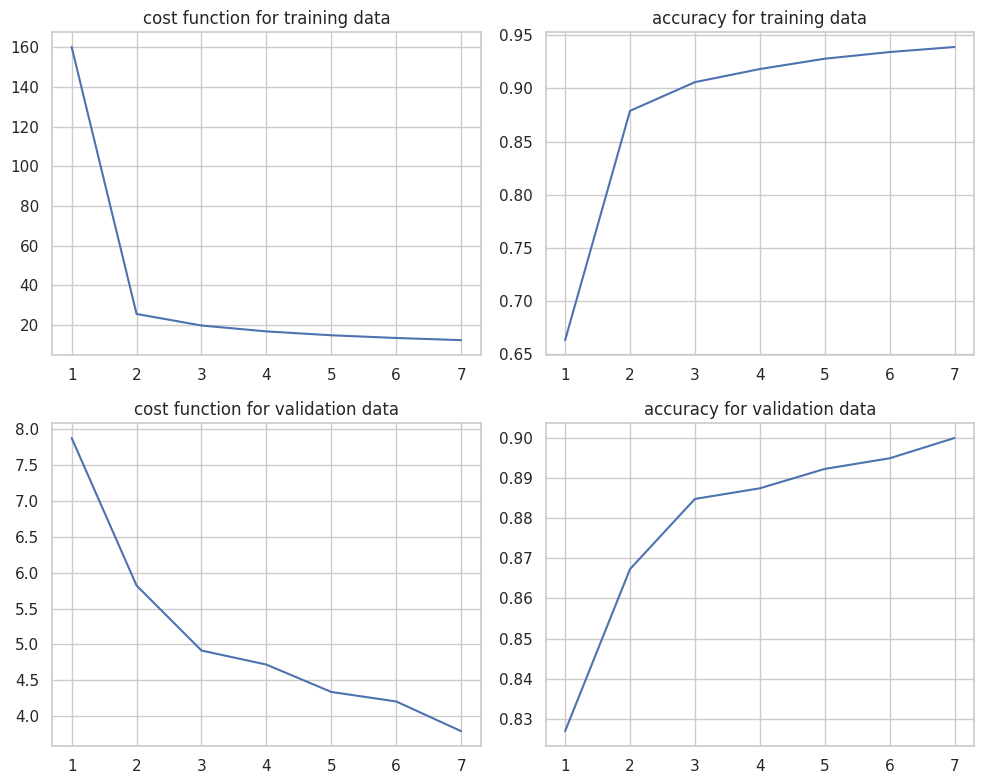

In [89]:
batches = [32,64,128,256,512]
for batch in batches:
    training_loop(batch,0.005,myNetwork())


<p>  the best batch size is 32</p>
<h3>why it overfits</h3>
<p>a large batch size means the model is updating its weights based on the average error over a big chunk of data.</p>

<h3> in this model we add a drop out layer</h3><p>  it adds a bit of randomness to the learning process.dropout is a regularization technique where during training randomly selected neurons (along with their connections) are temporarily dropped out or ignored. This prevents specific neurons from becoming overly specialized</p>

In [90]:
drop_rate = 0.3
class myNetwork1(nn.Module):
    def __init__(self ):
        super(myNetwork1,self).__init__()
        self.norm = nn.BatchNorm1d(128)
        self.layer1 = nn.Linear(784, 128)
        self.dropout = nn.Dropout(drop_rate)
        self.norm2=nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.layer2= nn.Linear(128, 64)
        self.layer3=nn.Linear(64,10)

    def forward(self, x):
        x=x.float()
        x = self.layer1(x)
        x=  self.norm(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x=  self.norm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        return x

<p> trying the new network with dropout and layer normalization</p>

0.01
tensor(0.6319, grad_fn=<NllLossBackward0>)
tensor(0.1192, grad_fn=<NllLossBackward0>)
tensor(0.2778, grad_fn=<NllLossBackward0>)
tensor(0.0926, grad_fn=<NllLossBackward0>)
tensor(0.1654, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0175, grad_fn=<NllLossBackward0>)
[839.0380520522594, 222.96507171727717, 147.82802361156791, 112.75963548757136, 89.45988228591159, 73.38636507489718, 59.43413231684826]


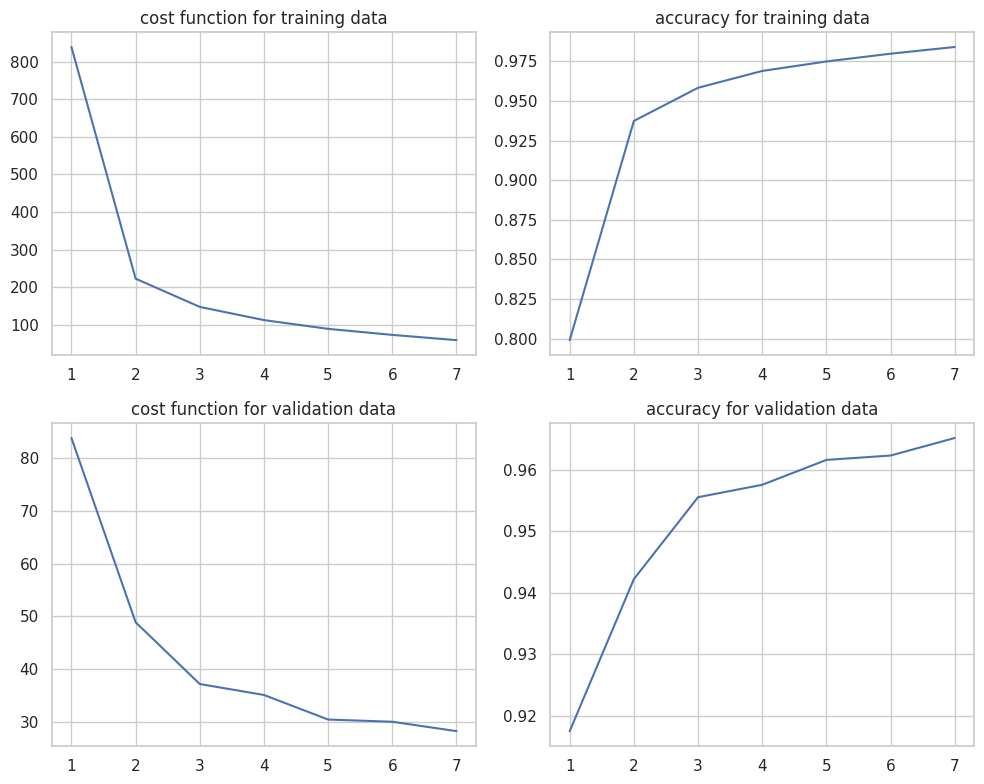

In [93]:

num_epochs=7
learning_rate=0.01
training_loop(32,0.01,myNetwork1())


<h3>Try different learning rates</h3>

0.01
tensor(0.5668, grad_fn=<NllLossBackward0>)
tensor(0.0876, grad_fn=<NllLossBackward0>)
tensor(0.1243, grad_fn=<NllLossBackward0>)
tensor(0.0529, grad_fn=<NllLossBackward0>)
tensor(0.1319, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.0562, grad_fn=<NllLossBackward0>)
[863.9112185835838, 222.73421572707593, 149.3496249904856, 112.26612655958161, 89.64949853811413, 71.54228616680484, 60.025855976273306]


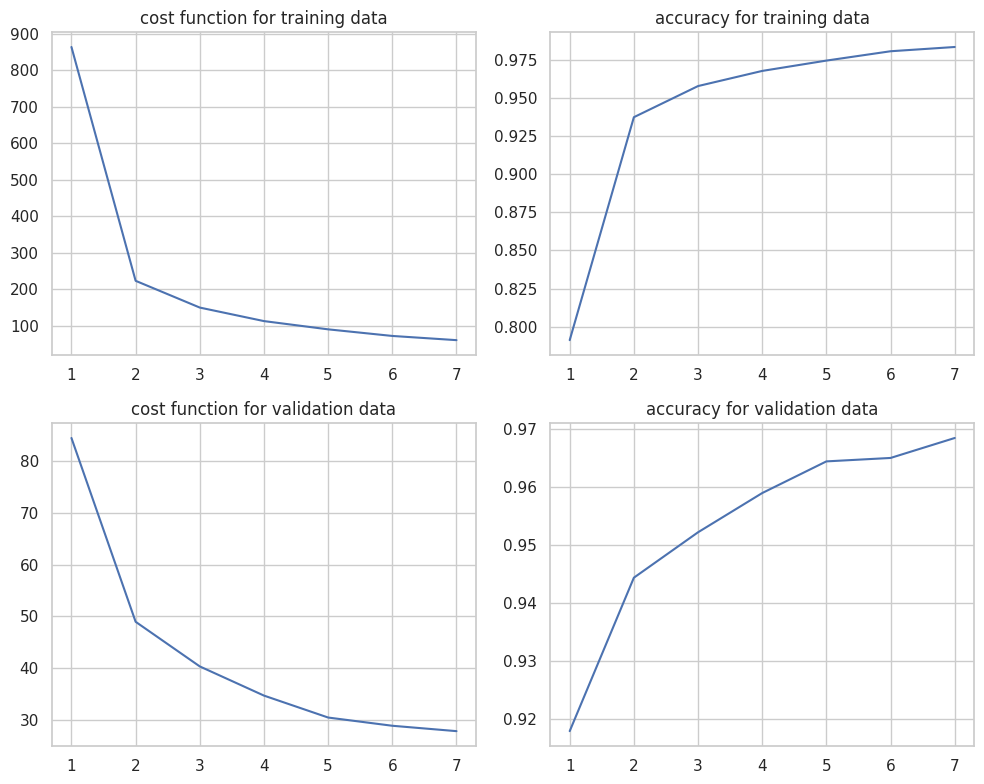

0.05
tensor(0.8629, grad_fn=<NllLossBackward0>)
tensor(0.2732, grad_fn=<NllLossBackward0>)
tensor(0.1145, grad_fn=<NllLossBackward0>)
tensor(0.0136, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.0533, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
[531.7538506090641, 147.99317753314972, 94.8023025917355, 66.95180354965851, 50.8035677538719, 40.11151908143074, 29.91256171121495]


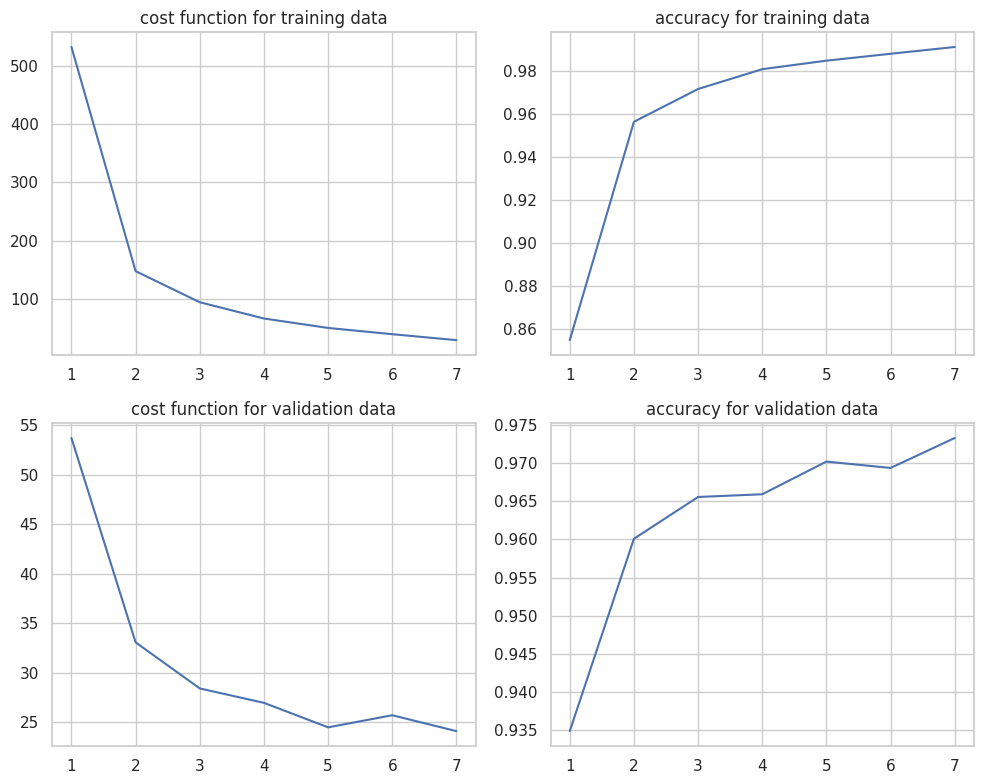

0.2
tensor(0.3353, grad_fn=<NllLossBackward0>)
tensor(0.0713, grad_fn=<NllLossBackward0>)
tensor(0.0270, grad_fn=<NllLossBackward0>)
tensor(0.3045, grad_fn=<NllLossBackward0>)
tensor(0.0365, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.0585, grad_fn=<NllLossBackward0>)
[456.7528843358159, 132.5260545234196, 84.83235354418866, 66.28627270454308, 51.504059589948156, 41.57356025662739, 29.503952647486585]


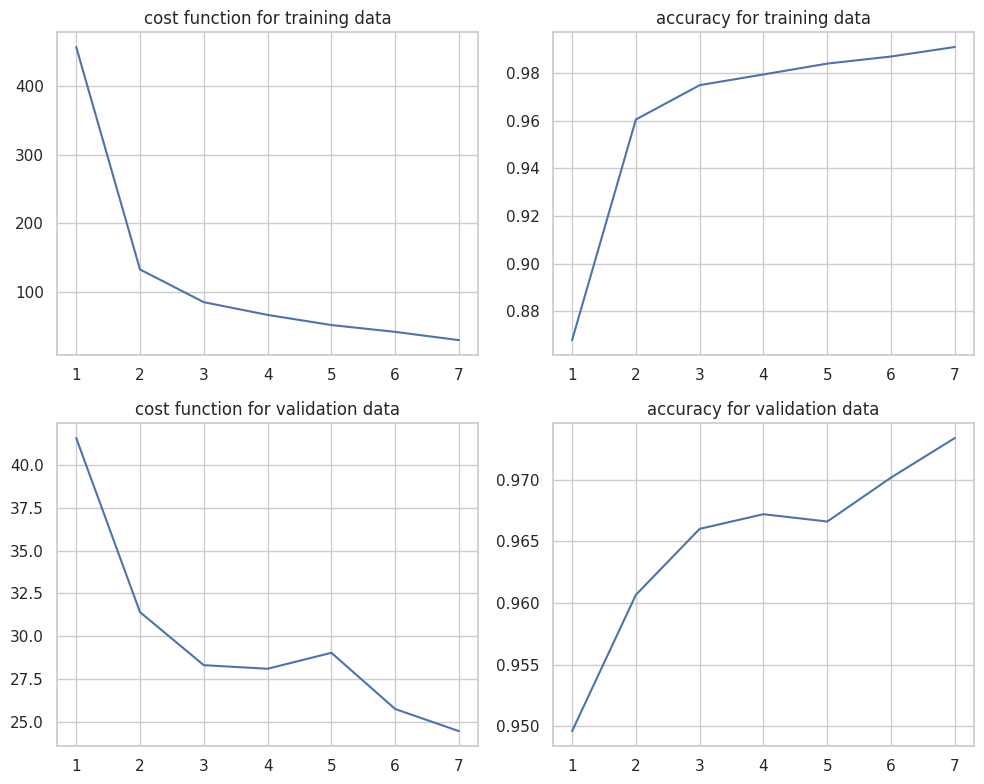

0.1
tensor(0.4689, grad_fn=<NllLossBackward0>)
tensor(0.0758, grad_fn=<NllLossBackward0>)
tensor(0.1478, grad_fn=<NllLossBackward0>)
tensor(0.0724, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0373, grad_fn=<NllLossBackward0>)
[482.5416920930147, 137.9367576255463, 88.303694202099, 66.67768253351096, 50.32874601252843, 37.360812283091946, 29.65058164256334]


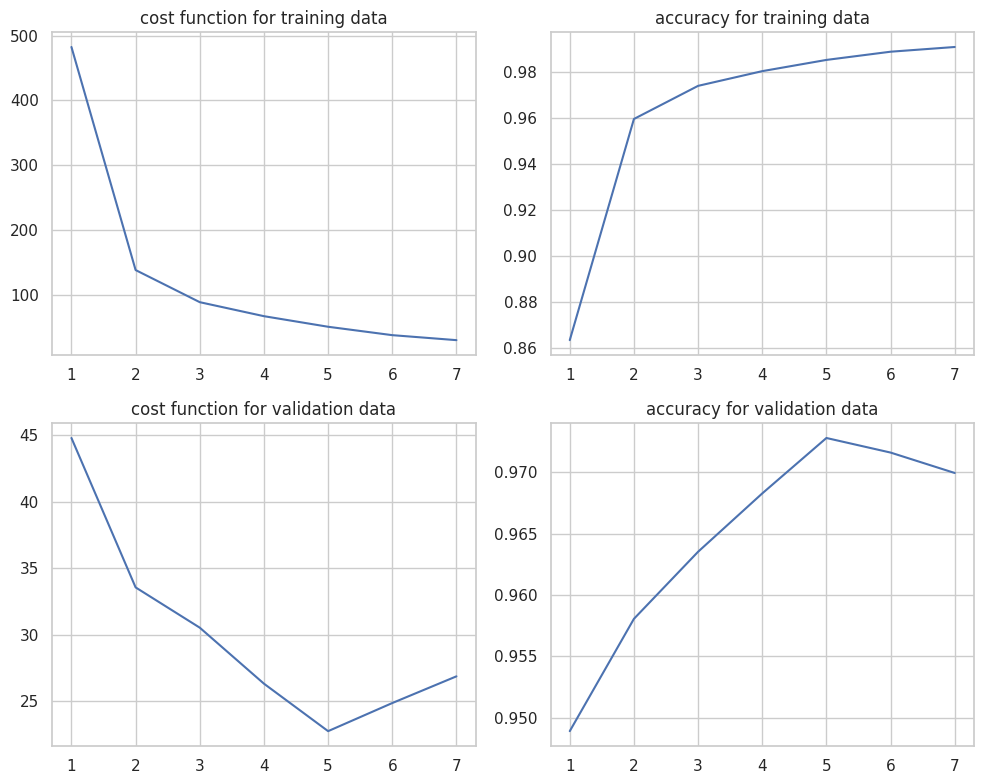

0.3
tensor(0.4936, grad_fn=<NllLossBackward0>)
tensor(0.1592, grad_fn=<NllLossBackward0>)
tensor(0.0799, grad_fn=<NllLossBackward0>)
tensor(0.0477, grad_fn=<NllLossBackward0>)
tensor(0.1629, grad_fn=<NllLossBackward0>)
tensor(0.2333, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
[453.52707543224096, 135.75890297826845, 88.3128690974554, 67.57935347314924, 52.73944989492884, 42.83906415870297, 32.564549643670034]


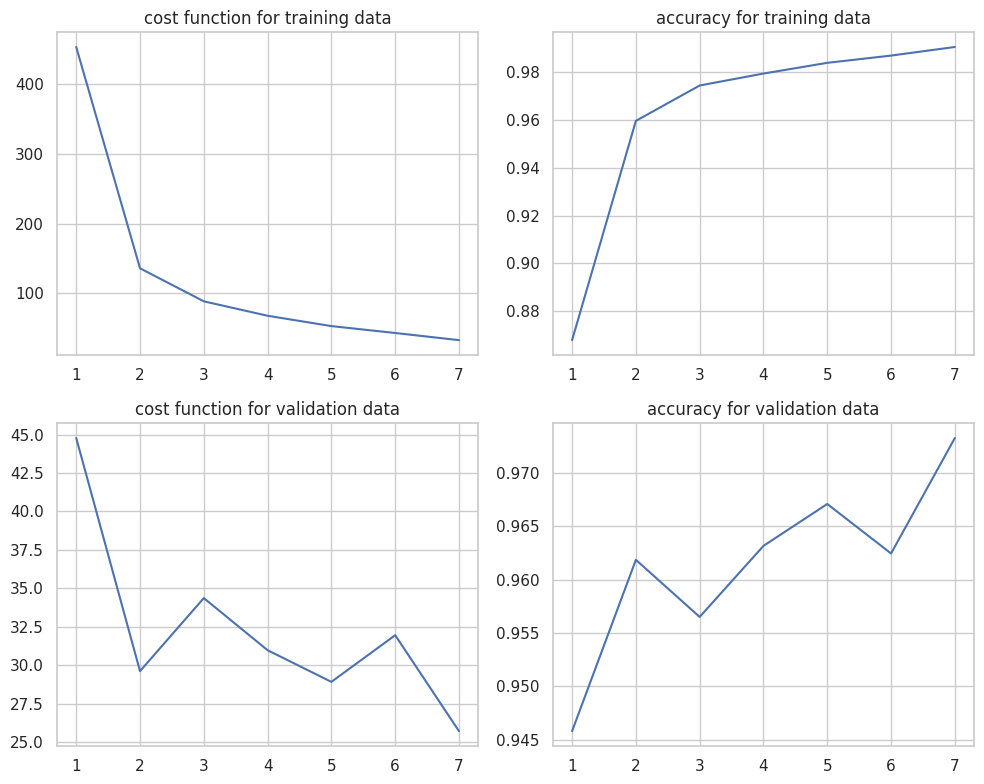

In [96]:
learning_rates = [0.01,0.05,0.2,0.1,0.3]
for rate in range(len(learning_rates)):
    training_loop(32,learning_rates[rate],myNetwork1())


<p> we expect best learning rate is 0.2</p>

<h3>Try different batches</h3>

0.2
tensor(0.2954, grad_fn=<NllLossBackward0>)
tensor(0.1041, grad_fn=<NllLossBackward0>)
tensor(0.0456, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.2200, grad_fn=<NllLossBackward0>)
tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
[459.67173824459314, 134.78122905408964, 88.11969244619831, 65.26805024663918, 53.32685456966283, 38.45729866286274, 31.857699637534097]


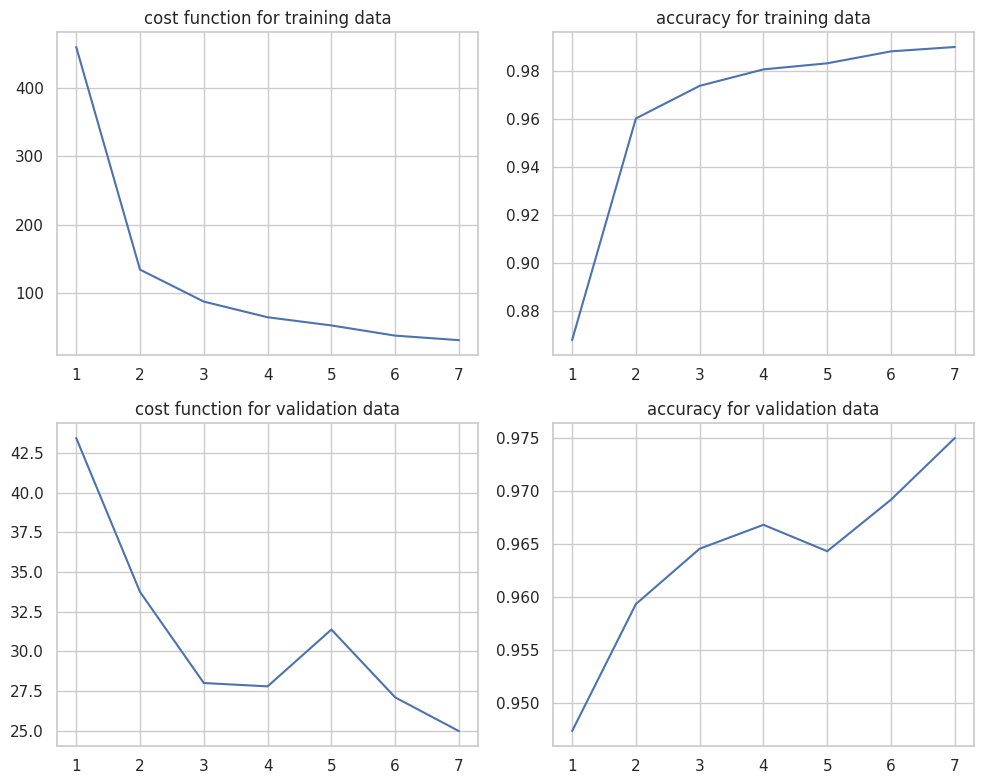

0.2
tensor(0.4588, grad_fn=<NllLossBackward0>)
tensor(0.1573, grad_fn=<NllLossBackward0>)
tensor(0.0299, grad_fn=<NllLossBackward0>)
tensor(0.1697, grad_fn=<NllLossBackward0>)
tensor(0.0432, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0122, grad_fn=<NllLossBackward0>)
[223.58507696539164, 69.97161553706974, 45.76934955827892, 33.236266545252874, 25.158414208795875, 20.035031179868383, 13.964741626405157]


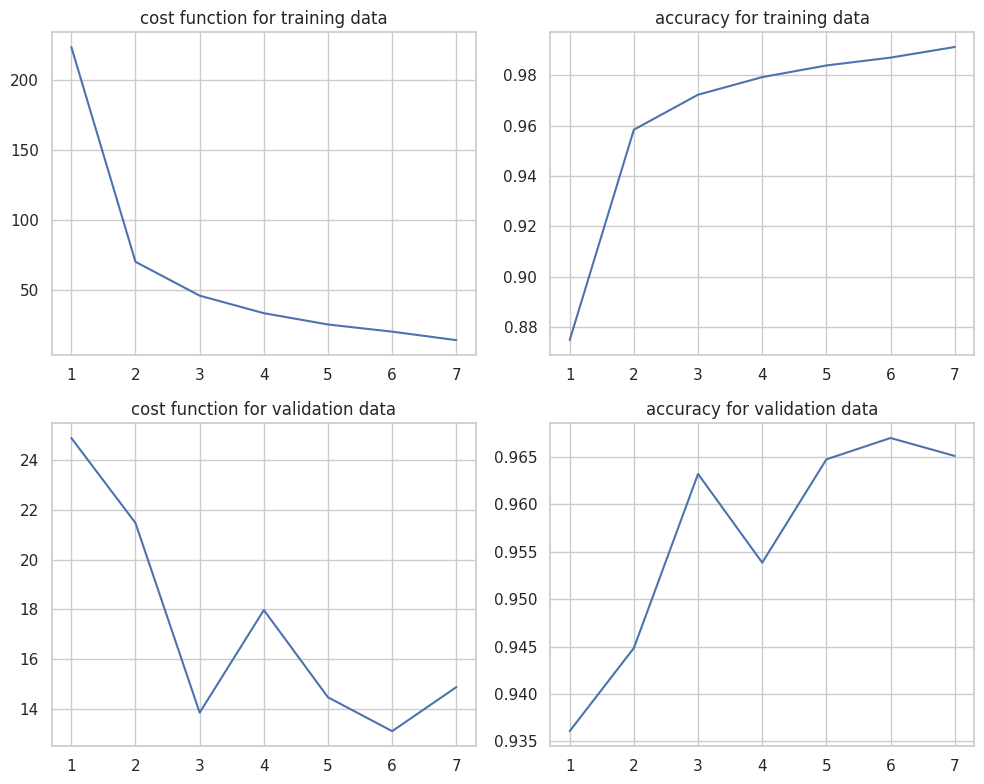

0.2
tensor(0.5297, grad_fn=<NllLossBackward0>)
tensor(0.1390, grad_fn=<NllLossBackward0>)
tensor(0.0549, grad_fn=<NllLossBackward0>)
tensor(0.0859, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.0429, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
[121.05757066607475, 42.34394181519747, 25.217561817727983, 18.787327815778553, 13.459268328268081, 10.331512623932213, 7.910251592518762]


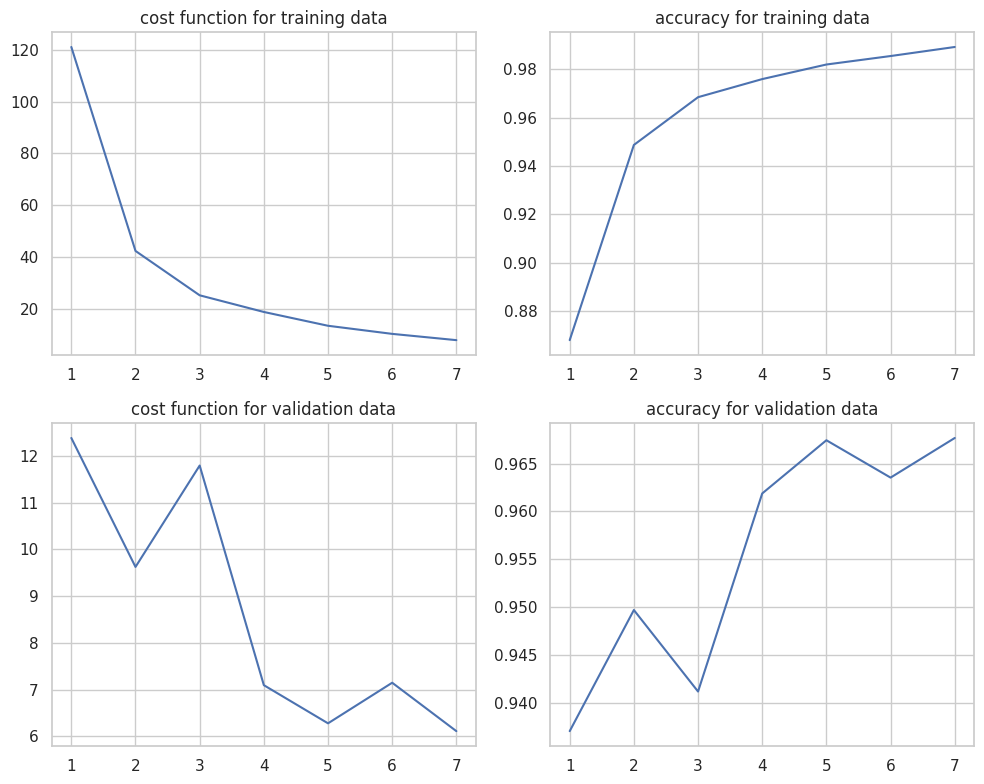

0.2
tensor(0.4091, grad_fn=<NllLossBackward0>)
tensor(0.0707, grad_fn=<NllLossBackward0>)
tensor(0.2013, grad_fn=<NllLossBackward0>)
tensor(0.0787, grad_fn=<NllLossBackward0>)
tensor(0.0300, grad_fn=<NllLossBackward0>)
tensor(0.0263, grad_fn=<NllLossBackward0>)
tensor(0.0745, grad_fn=<NllLossBackward0>)
[71.53453329205513, 78.83002842962742, 21.287089690566063, 15.525552608072758, 12.349759692326188, 9.966520369052887, 9.002174573019147]


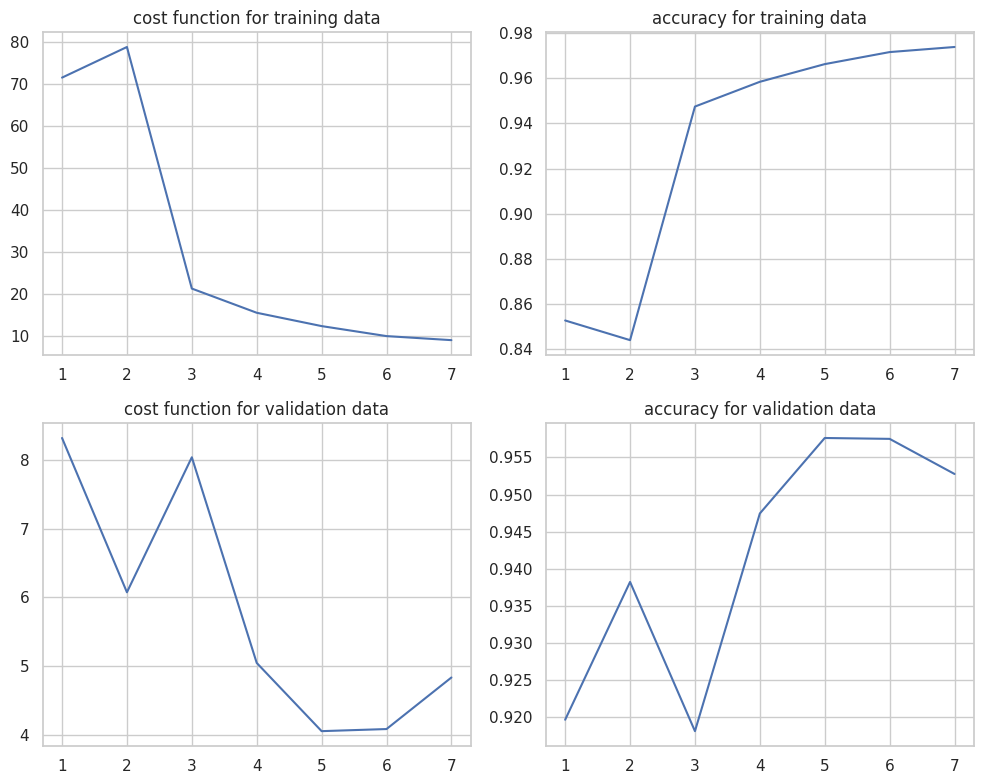

0.2
tensor(0.4736, grad_fn=<NllLossBackward0>)
tensor(1.2671, grad_fn=<NllLossBackward0>)
tensor(0.3794, grad_fn=<NllLossBackward0>)
tensor(0.3711, grad_fn=<NllLossBackward0>)
tensor(0.2647, grad_fn=<NllLossBackward0>)
tensor(0.2010, grad_fn=<NllLossBackward0>)
tensor(0.2580, grad_fn=<NllLossBackward0>)
[45.69798964262009, 196.91899007558823, 50.01199659705162, 22.543768242001534, 18.17896819114685, 16.131380409002304, 17.162406906485558]


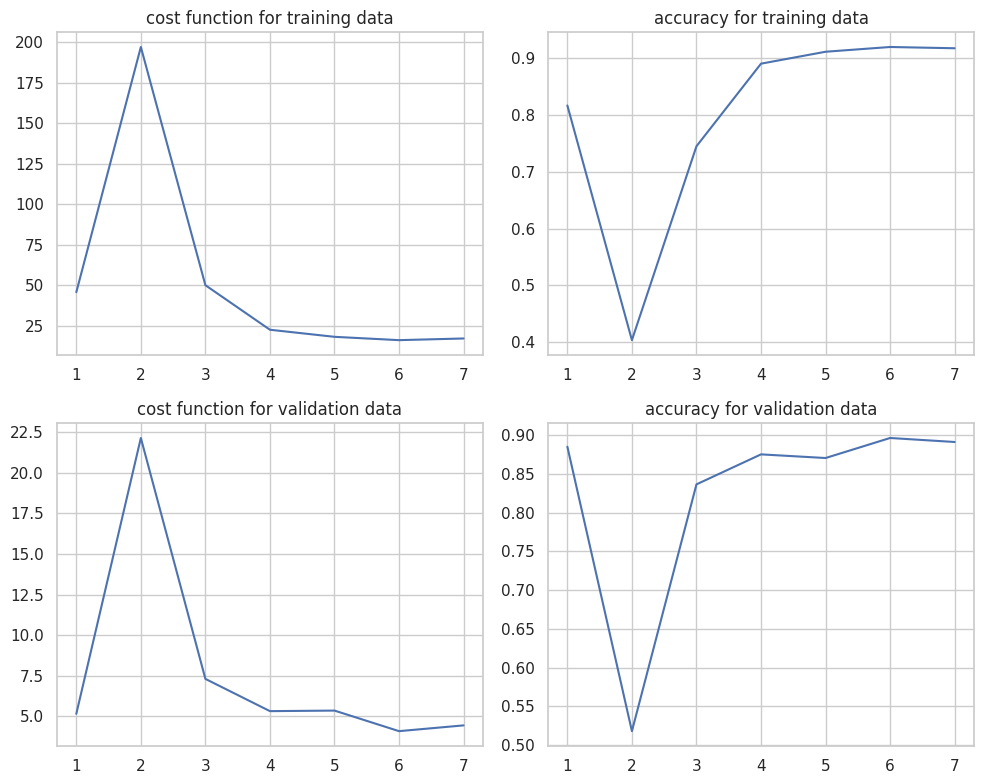

In [98]:
batches = [32,64,128,256,512]
for batch in batches:
    training_loop(batch,0.2,myNetwork1())

best batch size is 128 or 64

Try test data for batch = 64 and learning rate = 0.2


0.2


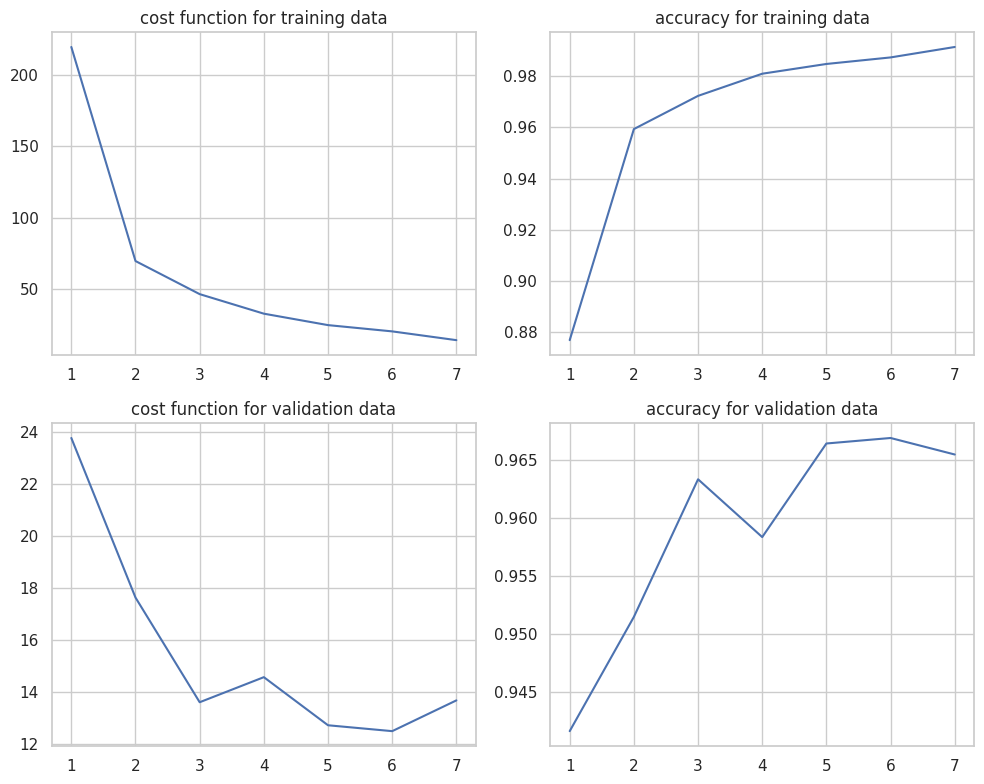

In [100]:
# get model
model=training_loop(64,0.2,myNetwork1())


In [106]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
Y_test = training_data['label']
X_test= training_data.drop('label', axis=1)

Y_test = Y_test.to_numpy()
X_test = X_test.to_numpy()

Y_test = torch.tensor(Y_test)
X_test = torch.tensor(X_test)
test_dataset=TensorDataset(X_test,Y_test)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)

# Set the model to evaluation mode
model.eval()

# Lists to store predicted labels and ground truth labels
predicted_labels = []
true_labels = []

# Make predictions on the test dataset
with torch.no_grad():
    for X, Y in test_loader:
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(Y.tolist())

predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Calculate evaluation metrics using scikit-learn
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print or display the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9877380952380952
F1 Score: 0.9877303751505162
Confusion Matrix:
[[4109    0    8    2    5    0    3    0    5    0]
 [   0 4673    4    2    0    0    0    2    3    0]
 [   3    5 4149    9    2    0    1    4    4    0]
 [   2    1   13 4313    0    7    0    3    8    4]
 [   0    9    0    0 4038    0    1    2    1   21]
 [   5    4    1   70    2 3663   13    0   29    8]
 [  12    1    4    0   11    2 4098    0    9    0]
 [   3   11   25   12    5    3    0 4307    2   33]
 [   3    4    9    5    2    2    1    1 4032    4]
 [   5    3    1   26   20    7    0    6   17 4103]]
